In [1]:
import os
os.chdir('..')

In [2]:
import os
os.getcwd()

'/home/ali/tum/motion_planning/social_ai_practical_course'

In [3]:
# Import libraries and data
import os
import numpy as np
import pickle

from src.utils.linear_regressor import perform_linear_regression
from config.settings import ROOT_DIR, saved_models_path
from src.utils.column_import import columns
from src.utils.evaluate_and_save import evaluate_and_save, residuals_plot


#from src.data_processing.create_vis_data import s_x, s_y, v_x, v_y, a_x, a_y 
s_x, s_y, v_x, v_y, a_x, a_y = columns

/home/ali/tum/motion_planning/social_ai_practical_course/data/processed/inD/x_y_recording_00_range_384.csv
/home/ali/tum/motion_planning/social_ai_practical_course/data/processed/scenario_samples/lane_merging/dif_set/test_set_00.csv


# Ballistic acceleration model

## Matrix creation

In [4]:

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate(y_test, y_pred):
    
    # Evaluate the model using various metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the results in scientific notation
    print(f'Mean Squared Error (MSE): {mse:.4e}')
    print(f'Mean Absolute Error (MAE): {mae:.4e}')
    print(f'R-squared (R²) Score: {r2:.4e}')

    # Crate a scatter plot
    plt.scatter(y_test, y_pred, alpha=0.7)

    # Add a diagonal line for reference (perfect prediction)
    min_val = min(np.min(y_test), np.min(y_pred))
    max_val = max(np.max(y_test), np.max(y_pred))

    # Setting limits for x and y axes
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)

    #min_val = min(y_test)
    #max_val = max(y_test)
    plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

    # Add labels and title
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Test')

    # Set aspect ratio to be equal
    plt.gca().set_aspect('equal', adjustable='box')

    # Show legend
    plt.legend()

    plt.gcf().set_size_inches(7,7)  # Adjust the size as needed


    # Show the plot
    plt.show()



In [5]:

# Index shifting:
# k-1         k           k+1
# 0:-2         1:-1        2:
s_x_1 = s_x[1:-1]
s_y_1 = s_y[1:-1]
s_x_2 = s_x[2:]
s_y_2 = s_y[2:]

v_x_1 = v_x[1:-1]
v_y_1 = v_y[1:-1]
v_x_2 = v_x[2:]
v_y_2 = v_y[2:]

a_x_1 = a_x[1:-1]
a_y_1 = a_y[1:-1]

# Predict the distance


In [6]:
dt = 0.04
dt_2 = dt ** 2 /2
dt_2

0.0008

Mean Squared Error (MSE): 1.0732e+01
Mean Absolute Error (MAE): 1.1499e-01
R-squared (R²) Score: 9.9021e-01


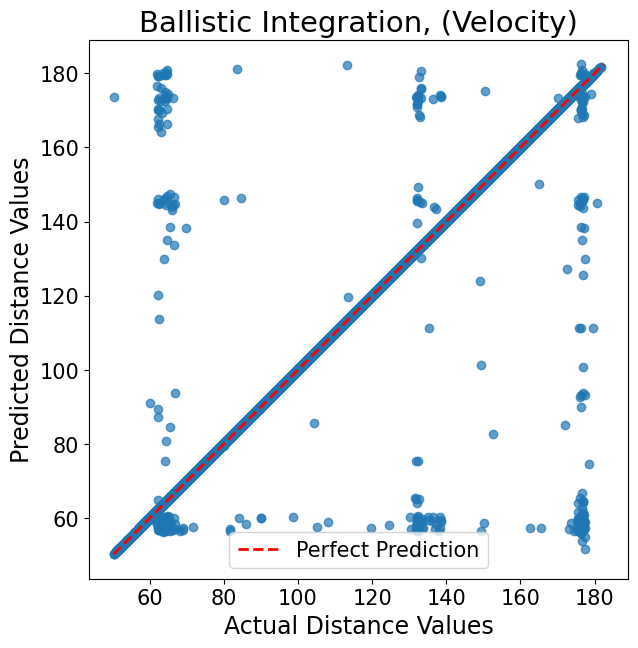

In [7]:
s_x_2_pred = s_x_1 + dt * v_x_1 + dt_2 * a_x_1
evaluate_and_save(s_x_2, s_x_2_pred, 'Ballistic Integration, (Velocity)', 'Actual Distance Values', 'Predicted Distance Values')

# Predict Velocity

Mean Squared Error (MSE): 4.9257e-01
Mean Absolute Error (MAE): 2.4853e-02
R-squared (R²) Score: 9.9051e-01


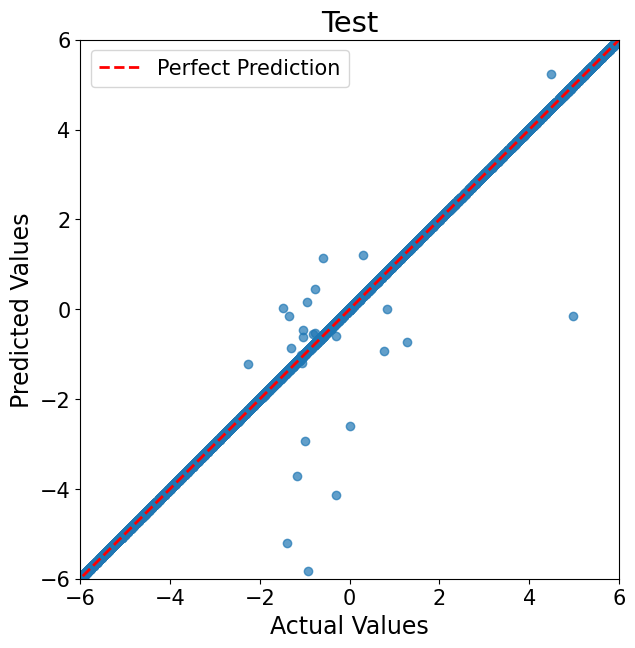

In [8]:
v_x_2_pred = v_x_1 + dt* a_x_1
evaluate(v_x_2, v_x_2_pred)
#evaluate_and_save(v_x_2, v_x_2_pred, 'Ballistic Integration, (Velocity)', 'Actual Velocity Values', 'Predicted Velocity Values')

# Predict the acceleration

In [9]:
dt__2 = 2/ dt**2
print(dt__2)
print(dt)

1250.0
0.04


Mean Squared Error (MSE): 8.6208e-23
Mean Absolute Error (MAE): 6.2449e-12
R-squared (R²) Score: 1.0000e+00


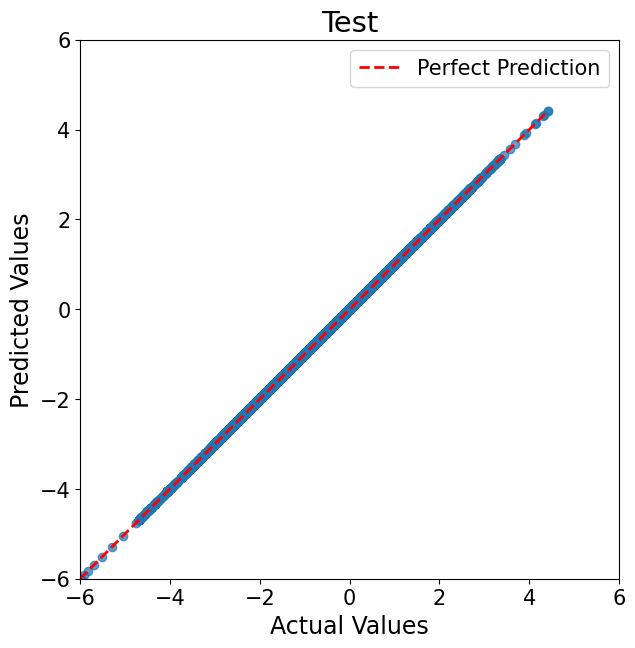

In [10]:
a_x_1_pred_distance = dt__2 * (s_x_2_pred- s_x_1 - dt * v_x_1)
evaluate(a_x_1, a_x_1_pred_distance)
#evaluate_and_save(a_x_1, a_x_1_pred_distance, 'Ballistic Integration, (Distance)', 'Actual Acceleration Values', 'Predicted Acceleration Values')

Mean Squared Error (MSE): 3.0786e+02
Mean Absolute Error (MAE): 6.2132e-01
R-squared (R²) Score: -8.5282e+02


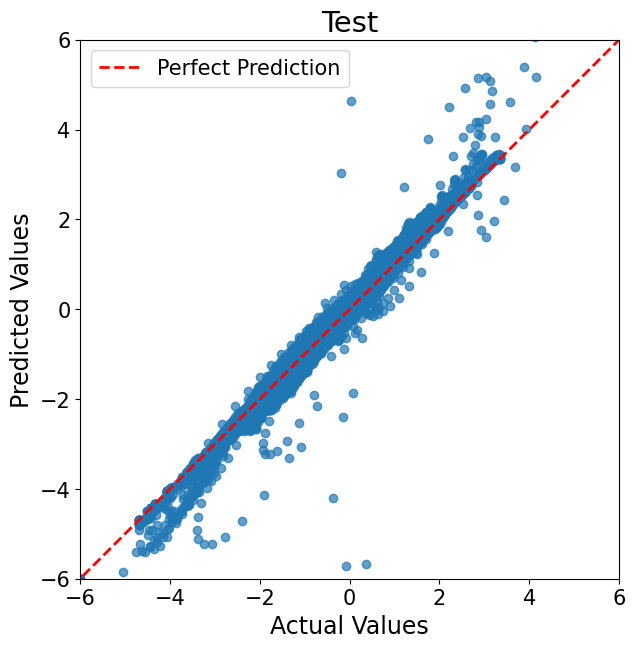

In [11]:
a_x_1_pred_velocity =  (1/dt) * (v_x_2- v_x_1)
evaluate(a_x_1, a_x_1_pred_velocity)

# Compare the accelerations from distance and form velocity

Mean Squared Error (MSE): 3.0786e+02
Mean Absolute Error (MAE): 6.2132e-01
R-squared (R²) Score: -8.5282e+02


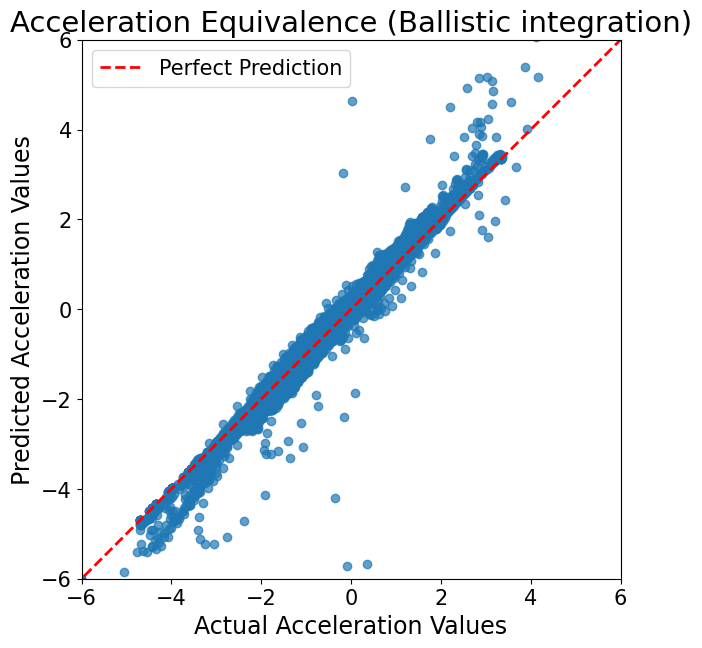

In [14]:
evaluate_and_save(a_x_1_pred_distance, a_x_1_pred_velocity, 'Acceleration Equivalence (Ballistic integration)', 'Actual Acceleration Values', 'Predicted Acceleration Values', set_limit=True)